# Course Description
Linear regression and logistic regression are two of the most widely used statistical models. They act like master keys, unlocking the secrets hidden in your data. In this course, you’ll gain the skills you need to fit simple linear and logistic regressions. Through hands-on exercises, you’ll explore the relationships between variables in real-world datasets, including motor insurance claims, Taiwan house prices, fish sizes, and more. By the end of this course, you’ll know how to make predictions from your data, quantify model performance, and diagnose problems with model fit.

### Credits
Maarten Van den Broeck
Amy Peterson
Maggie Matsui
Richie Cotton

# Module 1. Simple Linear Regression
You’ll learn the basics of this popular statistical model, what regression is, and how linear and logistic regressions differ. You’ll then learn how to fit simple linear regression models with numeric and categorical explanatory variables, and how to describe the relationship between the response and explanatory variables using model coefficients.

## A tale of two variables
### Regression
* Statistical models to explore the relationship a response variable and some explanatory variables.
* Given values of explanatory variables, you can predict the values of the response variable.

**1. Response variable** : The variable that you want to predict.

**2. Explanatory variables** :  The variables that explain how the response variable will change.

**3. Linear regression** :  The response variable is numeric

**4. Logistic regression**: The response variable is logical.

### Python packages for regression
1. statsmodels: Optimized for insight
2. scikit-learn: Optimized for prediction

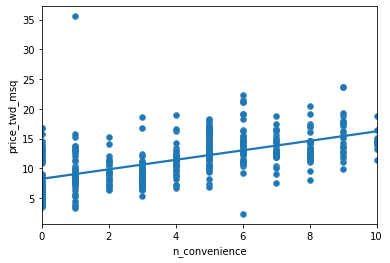

In [1]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Import pandas
import pandas as pd

taiwan_real_estate = pd.read_csv("./datasets/taiwan_real_estate2.csv")

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of n_convenience vs. price_twd_msq
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

catter plots are the standard way to visualize the relationship between two numeric variables, and seaborn makes adding linear trend lines easy.

## Fitting a linear regression
### Linear regression with ols()

In [2]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


#### Inference
1. On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.
2. If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

## Categorical explanatory variables
### Visualizing numeric vs. categorical

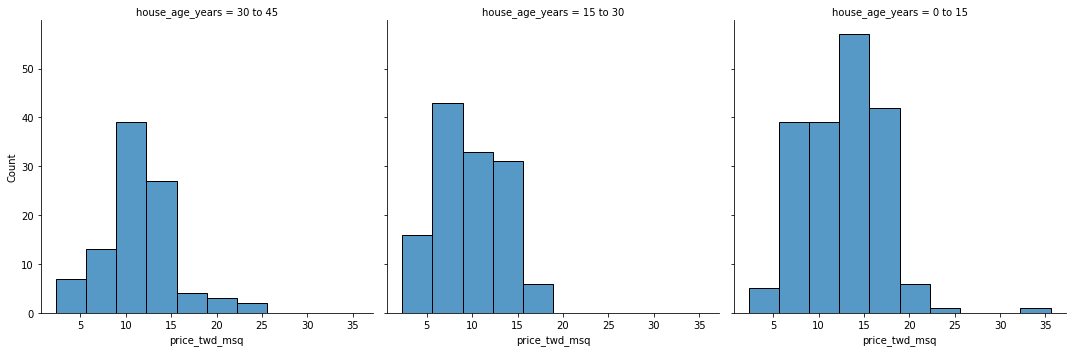

In [3]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         col_wrap=3,
         bins = 10)

# Show the plot
plt.show()

It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

### Calculating means by category

In [4]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


### Linear regression with a categorical explanatory variable
The coefficients of the model are just the means of each category

In [5]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [6]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# Module 2. Predictions and model objects
In this chapter, you’ll discover how to use linear regression models to make predictions on Taiwanese house prices and Facebook advert clicks. You’ll also grow your regression skills as you get hands-on with model objects, understand the concept of "regression to the mean", and learn how to transform variables in a dataset.

## Making predictions
### Predicting house prices

In [7]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


### Visualizing predictions

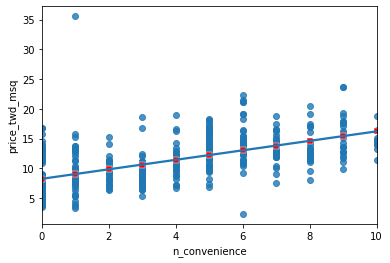

In [8]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x = 'n_convenience',
                y = "price_twd_msq",
                data=prediction_data,                color = 'red',
                marker = 's')

# Show the layered plot
plt.show()

### The limits of prediction
This regression model on some outliers

In [9]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(impossible)
print(price_twd_msq)

0     7.426158
1    10.219437
dtype: float64


Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

## Working with Models
### Extracting model elements
The model object created by ols() contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

* Fitted values: predictions on the original dataset
* Residuals: actual response values minus predicted response values

In [11]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)
print(mdl_price_vs_conv.fittedvalues)
print(mdl_price_vs_conv.resid)
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.41e-37
Time:                        08:06:02   Log-Likelihood:                -1091.1
No. Observations:                 414   

Working with individual pieces of the model is often more useful than working with the whole model object at once.

### Manually predicting house prices

response = intercept + slope * explanatory

In [12]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


## Regression to the mean
### The concept
1. Response value = fitted value + residuals
2. "The stuff you explained" + "the stuffs you couldn't explain"
3. Residuals exist due to problems in the model and fundamental randomness
4. Extreme cases are often due to randomness
5. Regression to the mean means extreme cases don't persist over time

### Plotting consecutive portfolio returns

In [13]:
sp500_yearly_returns = pd.read_csv("./datasets/sp500_yearly_returns.csv")
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


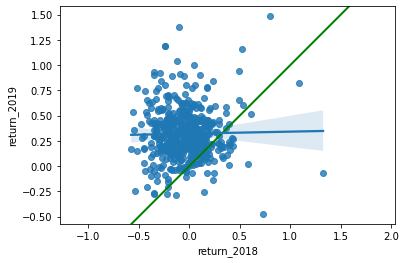

In [14]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x = 'return_2018', y = 'return_2019', data = sp500_yearly_returns)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

### Modeling consecutive returns

In [15]:
# Run a linear regression on return_2019 vs. return_2018
# using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data = sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [16]:
# From previous step
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


#### Inference
Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

## Transforming variables
If there is no straight line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. 

**Square root is a good transformation technique if your data is right skewed**

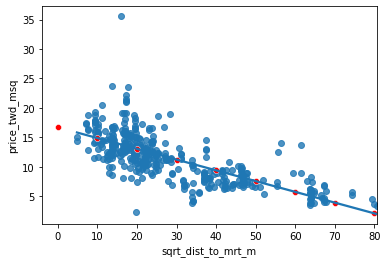

In [17]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
# This is important Step <--------------------- IMP
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x = 'sqrt_dist_to_mrt_m', y = 'price_twd_msq', data = prediction_data, color='red')
plt.show()

By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

### Transforming the response variable too
The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In [18]:
ad_conversion = pd.read_csv("./datasets/ad_conversion.csv")

In [19]:
# From previous steps
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

# build model
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


Since the response variable has been transformed. Now we need to perform reverse transformation.

In [20]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


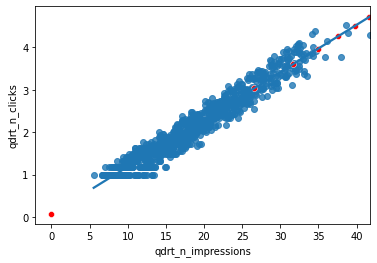

In [21]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x = 'qdrt_n_impressions', y = 'qdrt_n_clicks', data = prediction_data, color='red')
plt.show()

Notice that your back-transformed predictions nicely follow the trend line and allow you to make more accurate predictions

### Without transformations

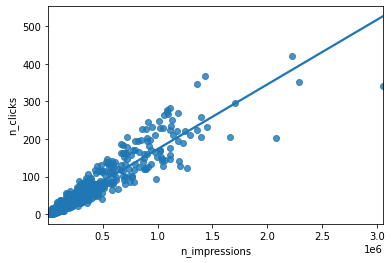

In [22]:
sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
plt.show()

Seems data is right skewed.

# Module 3. Assessing model fit
In this chapter, you’ll learn how to ask questions of your model to assess fit. You’ll learn how to quantify how well a linear regression model fits, diagnose model problems using visualizations, and understand each observation's leverage and influence to create the model.

## Quantifying model fit
### Coefficient of determination
* The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.
* The proportion of the variance in the response variable that is predictable from the explanatory variable.
    * 1 means a perfect fit
    * 0 means the worst possible fit
* Called "r-squared" for SLR and "R-squared" for MLR

### Residual standard error (RSE)
* A "typical" difference between a prediction and an observed response.
* Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.
* It has the same unit as the response variable.
* RSE is a measure of accuracy for regression models. It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.
* MSE = RSE²

Steps to calculate residuals squared (RSE)
* sum of residuals squared
* degrees of freedom
* square root of ratio

In [27]:
# Before transformation
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion, ci=None).fit()

# After transformation
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

### Comparision
1. R squared

In [28]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:30:31   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [29]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


2. Residual Standard Error

In [30]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478134
RSE of transformed model:  0.19690640896875722


#### Interpretation
mdl_click_vs_impression_orig has an RSE of about 20. This means The typical difference between observed number of clicks and predicted number of clicks is 20

## Visualizing model fit
### Residual properties of a good fit
* Residuals are normally distributed
* The mean of the residuals is zero
* the size of the residuals shouldn't change much as the fitted values change.

### residplot()

In [36]:
import seaborn as sns

1. Orignal Data

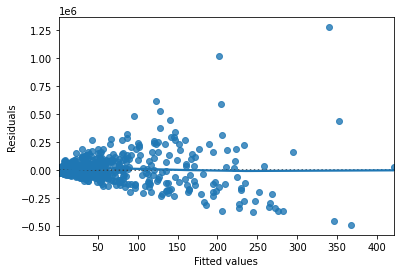

In [34]:
sns.residplot(x="n_clicks", y="n_impressions", data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

2. Transformed Data

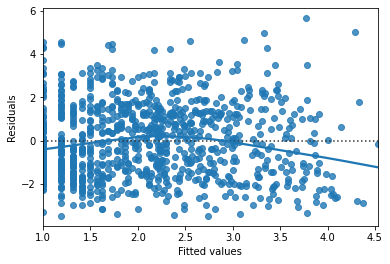

In [35]:
sns.residplot(x="qdrt_n_clicks", y="qdrt_n_impressions", data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

The residuals track the  line y = 0 more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

### 2. Q-Q plot of residuals

In [37]:
from statsmodels.api import qqplot

1. Orignal Data

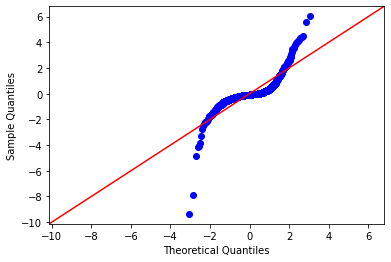

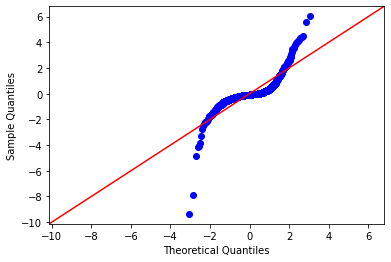

In [40]:
qqplot(data=mdl_click_vs_impression_orig.resid, fit=True, line="45")

2. Transformed Data

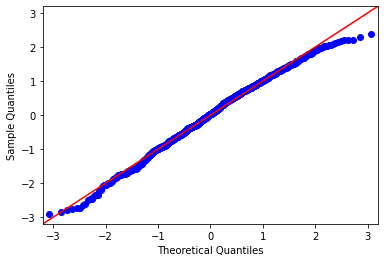

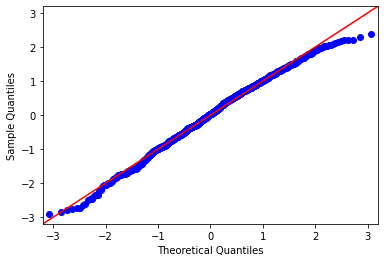

In [41]:
qqplot(data=mdl_click_vs_impression_trans.resid, fit=True, line="45")

The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data

#### 3. Scale-location plot

1. Orignal Data

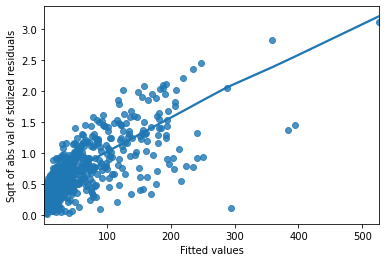

In [44]:
model_norm_residuals_click = mdl_click_vs_impression_orig.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_click = np.sqrt(np.abs(model_norm_residuals_click))
sns.regplot(x = mdl_click_vs_impression_orig.fittedvalues, y=model_norm_residuals_abs_sqrt_click, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

2. Transformed Data

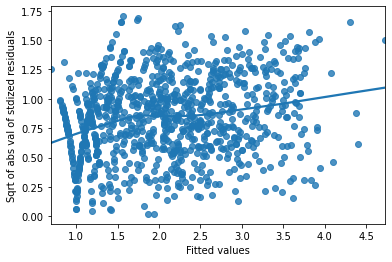

In [45]:
model_norm_residuals_click = mdl_click_vs_impression_trans.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_click = np.sqrt(np.abs(model_norm_residuals_click))
sns.regplot(x = mdl_click_vs_impression_trans.fittedvalues, y=model_norm_residuals_abs_sqrt_click, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data

## Outliers, leverage, and influence
There are 2 kinds of outliers
1. Extreme explanatory variables
2. Prediction lies far from the trend line

### Leverage 
* Leverage is a measure of how extreme the explanatory variable values are.
* Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset.
* Points with extreme value of x are said to have high leverage

### Influence 
* Influence measures how much the model would change if you le/ the observation out of the dataset when modeling.
* Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.
*The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

### Extracting leverage and influence

In [52]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

In [53]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
taiwan_real_estate.sort_values("leverage", ascending = False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
347,6488.021,1,15 to 30,3.388805,80.548253,0.026665,0.003508
116,6396.283,1,30 to 45,3.691377,79.976765,0.026135,0.004470
249,6306.153,1,15 to 30,4.538578,79.411290,0.025617,0.009373
255,5512.038,1,30 to 45,5.264750,74.243101,0.021142,0.006304
8,5512.038,1,30 to 45,5.688351,74.243101,0.021142,0.009060


In [54]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
taiwan_real_estate.sort_values("cooks_dist", ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,15.892835,0.003849,0.115549
148,3780.5900,0,15 to 30,13.645991,61.486503,0.012147,0.052440
228,3171.3290,0,0 to 15,14.099849,56.314554,0.009332,0.035384
220,186.5101,9,30 to 45,23.691377,13.656870,0.004401,0.025123
113,393.2606,6,0 to 15,2.299546,19.830799,0.003095,0.022813


# Module 4. Simple logistic regression
Learn to fit logistic regression models. Using real-world data, you’ll predict the likelihood of a customer closing their bank account as probabilities of success and odds ratios, and quantify model performance using confusion matrices.

### What is logistic regression?
* Another type of generalized linear model.
* Used when the response variable is logical.
* The responses follow logistic (S-shaped) curve

In [55]:
churn = pd.read_csv("./datasets/churn.csv")
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


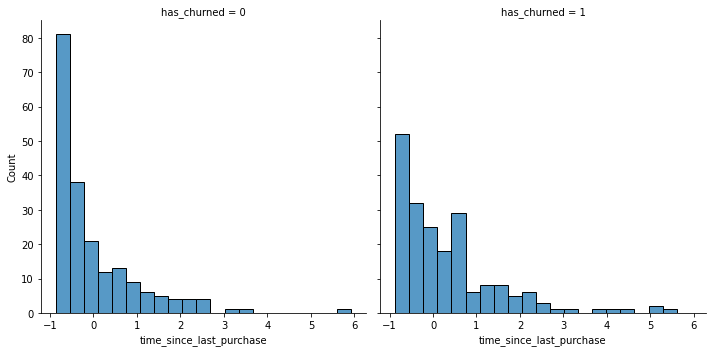

In [56]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn,
            x="time_since_last_purchase",
            col="has_churned")

# Show the plot
plt.show()

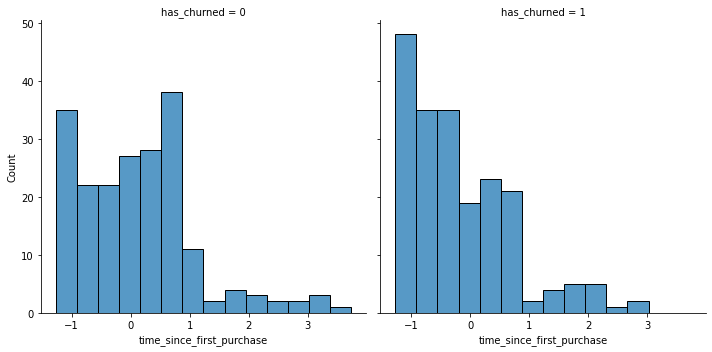

In [57]:
# Redraw the plot with time_since_first_purchase
sns.displot(data = churn, x = "time_since_first_purchase", col = "has_churned")

# Show the plot
plt.show()

the distribution of churned customers was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase). For time_since_first_purchase the opposite is true: churners have a shorter length of relationship.

### Visualizing linear and logistic models

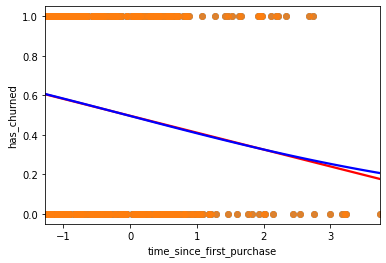

In [58]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x = "time_since_first_purchase", y = "has_churned", data = churn, ci = None, logistic = True, line_kws = {"color": "blue"})

# Show the plot
plt.show()

The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

### Logistic regression with logit()

In [70]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. 
# length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data = churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Prediction and Odd Ratios
### Odds ratios
Odds ratio is the probability of something happening divided by the probability that it doesn't.

This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

In [73]:
# Create prediction_data
explanatory_data = pd.DataFrame({"time_since_first_purchase": [-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0.5, 0.75, 1.0, 1.25, 1.25, 1.5, 1.75, 2.0, 2.25, 2.50, 2.75, 3, 3.25, 3.5, 3.75, 4]})
prediction_data = explanatory_data.assign(has_churned = mdl_churn_vs_relationship.predict(explanatory_data))
prediction_data.head()

,time_since_first_purchase,has_churned
0,-1.50,0.626448
1,-1.25,0.605470
2,-1.00,0.584096
3,-0.75,0.562401
4,-0.50,0.540465


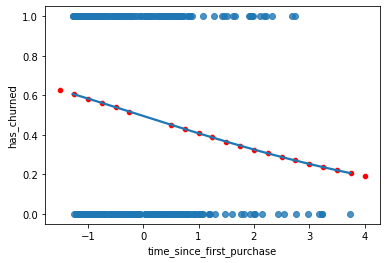

In [74]:
# Create a new figure
fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x = "time_since_first_purchase", y = "has_churned", data = churn,
ci = None, logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
y="has_churned",
data=prediction_data,
color="red")

# Show the plot
plt.show()

### Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

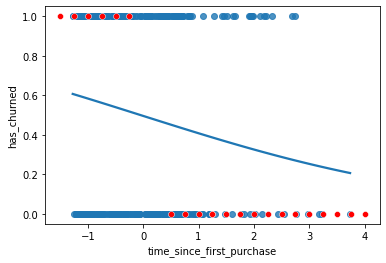

In [78]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Create a scatter plot with logistic trend line
sns.regplot(x = "time_since_first_purchase", y = "has_churned", data = churn, ci = None, logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot(x = 'time_since_first_purchase', y = 'most_likely_outcome', data = prediction_data, color = 'red')

# Show the plot
plt.show()

### Odd Ratio

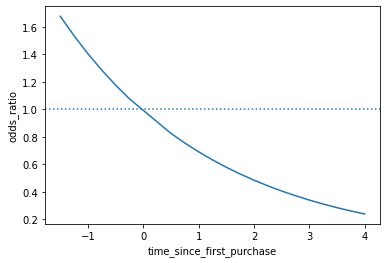

In [80]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Create a new figure
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = 'time_since_first_purchase', y = 'odds_ratio', data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

# Show the plot
plt.show()

Odds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses.

### Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

In [82]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
prediction_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.50,0.626448,1.0,1.677003,0.517008
1,-1.25,0.605470,1.0,1.534661,0.428309
2,-1.00,0.584096,1.0,1.404400,0.339610
3,-0.75,0.562401,1.0,1.285197,0.250912
4,-0.50,0.540465,1.0,1.176111,0.162213


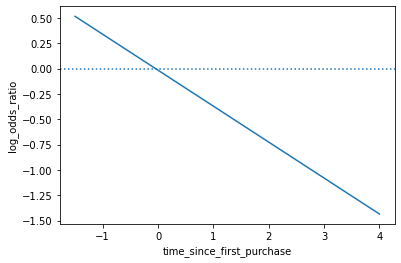

In [83]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Create a new figure
fig = plt.figure()

# Update the line plot: log_odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

# Show the plot
plt.show()

The linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.

## Quantifying logistic regression fit
### Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

1. **True positive:** The customer churned and the model predicted they would.
2. **False positive:** The customer didn't churn, but the model predicted they would.
3. **True negative:** The customer didn't churn and the model predicted they wouldn't.
4. **False negative:** The customer churned, but the model predicted they wouldn't.

In [85]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


### Drawing a mosaic plot of the confusion matrix

[[112.  88.]
 [ 76. 124.]]


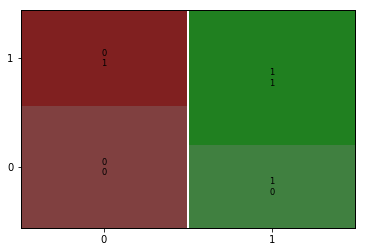

In [93]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

### Performance Metrics
1. Accuracy
<br>Accuracy is the proportion of correct predictions.</br>


2. Sensitivity
<br>Sensitivity is the proportion of true positives</br>


3. Specificity
<br>Specificity is the proportion of true negatives.</br>

In [94]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
